# **Mumbai House Prediction Model**

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [3]:
df = pd.read_csv('Mumbai_house.csv')
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [4]:
df1 = df.copy()
df1.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [57]:
df1['type'].unique()

array(['Apartment', 'Villa', 'Studio Apartment', 'Independent House',
       'Penthouse'], dtype=object)

In [58]:
df1.status.unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [59]:
df1.region.unique()

array(['Andheri West', 'Naigaon East', 'Borivali West', 'Panvel',
       'Mira Road East', 'Parel', 'Boisar', 'Santacruz East',
       'Badlapur East', 'Fort', 'Badlapur West', 'Khopoli', 'Chembur',
       'Jogeshwari West', 'Vasai', 'Kalamboli', 'Powai', 'Ghansoli',
       'Thane West', 'Vikhroli', 'Bhiwandi', 'Airoli', 'Ambernath West',
       'Borivali East', 'Virar', 'Kharghar', 'Ulwe', 'Kamothe',
       'Jogeshwari East', 'Mulund West', 'Palghar', 'Goregaon West',
       'Taloja', 'Rasayani', 'Ghatkopar East', 'Ulhasnagar', 'Dombivali',
       'Kewale', 'Nala Sopara', 'Goregaon East', 'Kandivali East',
       'Kurla', 'Andheri East', 'Dahisar', 'Karanjade', 'Mahim', 'Vashi',
       'Malad West', 'Girgaon', 'Dadar West', 'Bandra West',
       'Kandivali West', 'Kalyan West', 'Neral', 'Kalyan East', 'Karjat',
       'Ghatkopar West', 'Dronagiri', 'Mulund East', 'Navade', 'Ambivali',
       'Agripada', 'Owale', 'Ville Parle East', 'Kalwa', 'Khar',
       'Santacruz West', 'Nerul', 'K

In [106]:
df1.region.value_counts()

region
Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: count, Length: 228, dtype: int64

In [60]:
df1.age.unique()

array(['New', 'Resale', 'Unknown'], dtype=object)

In [5]:
df1.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [8]:
df1.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [61]:
df2 = df1.copy()
df3=df2.drop(['locality'],axis=1)
df3.head()

,bhk,type,area,price,price_unit,region,status,age
0,3,Apartment,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,659,94.11,L,Mira Road East,Under Construction,New


In [63]:
np.where(df3.price_unit=='Cr')[0]

array([    0,     2,     5, ..., 76035, 76036, 76037], dtype=int64)

In [64]:
# Define a function to convert prices to Lakhs
def convert_price_to_lakhs(row):
    if row['price_unit'] == 'Cr':
        return row['price'] * 100
    return row['price']

df3['price_in_lakhs'] = df3.apply(convert_price_to_lakhs, axis=1)

df3.head()

,bhk,type,area,price,price_unit,region,status,age,price_in_lakhs
0,3,Apartment,685,2.50,Cr,Andheri West,Ready to move,New,250.00
1,2,Apartment,640,52.51,L,Naigaon East,Under Construction,New,52.51
2,2,Apartment,610,1.73,Cr,Borivali West,Under Construction,New,173.00
3,2,Apartment,876,59.98,L,Panvel,Under Construction,New,59.98
4,2,Apartment,659,94.11,L,Mira Road East,Under Construction,New,94.11


In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bhk             76038 non-null  int64  
 1   type            76038 non-null  object 
 2   area            76038 non-null  int64  
 3   price           76038 non-null  float64
 4   price_unit      76038 non-null  object 
 5   region          76038 non-null  object 
 6   status          76038 non-null  object 
 7   age             76038 non-null  object 
 8   price_in_lakhs  76038 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 5.2+ MB


C:\Users\prana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


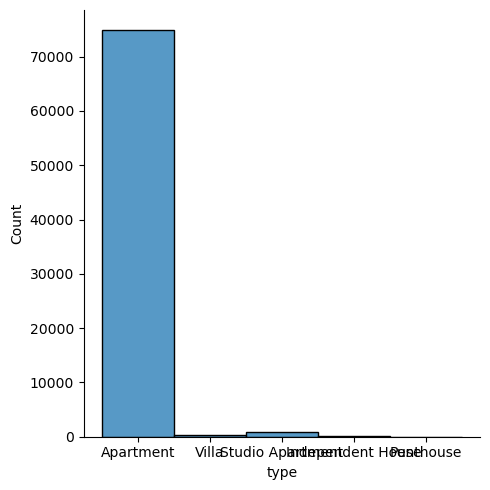

In [105]:
df4 = df3.copy()
sns.displot(df4.type)

C:\Users\prana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


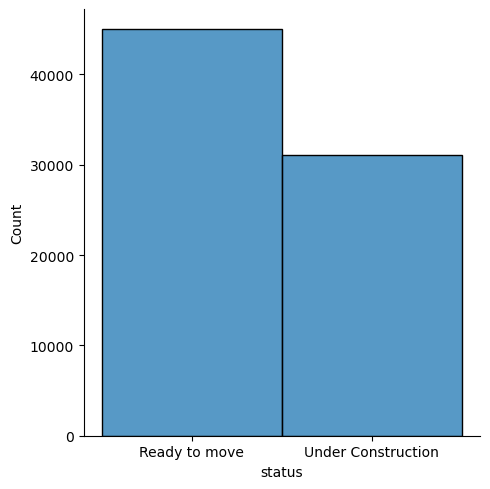

In [102]:
sns.displot(df4.status)

#### **Checking for any outliers**

Text(0.5, 0, 'bhk')

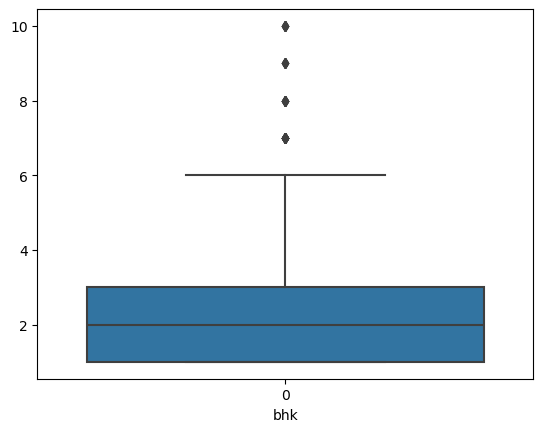

In [75]:
sns.boxplot(df4.bhk)
plt.xlabel('bhk')

Text(0.5, 0, 'area')

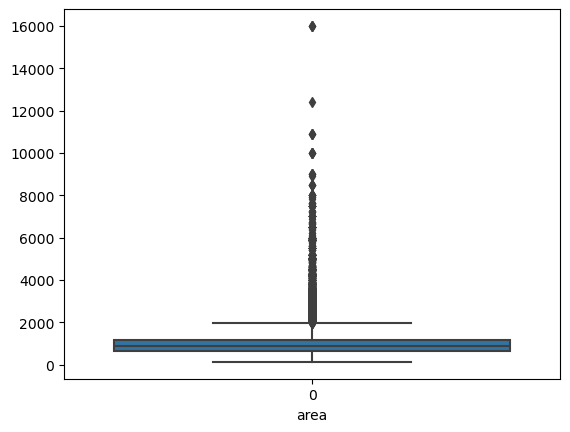

In [74]:
sns.boxplot(df4.area)
plt.xlabel('area')

So, there are some outliers present in the dataset and need to be removed

In [95]:
features = ['area','bhk']
for feature in features:
    percent75 = df4[feature].quantile(0.75)
    percent25 = df4[feature].quantile(0.25)
    IQR=percent75-percent25
    upper_limit = percent75+(IQR*1.5)
    lower_limit = percent25-(IQR*1.5)
    df4.loc[df4[feature]<=lower_limit,feature] = lower_limit # capping the outliers
    df4.loc[df4[feature]>=upper_limit,feature] = upper_limit
    

### Removed all the outliers

Text(0.5, 0, 'area')

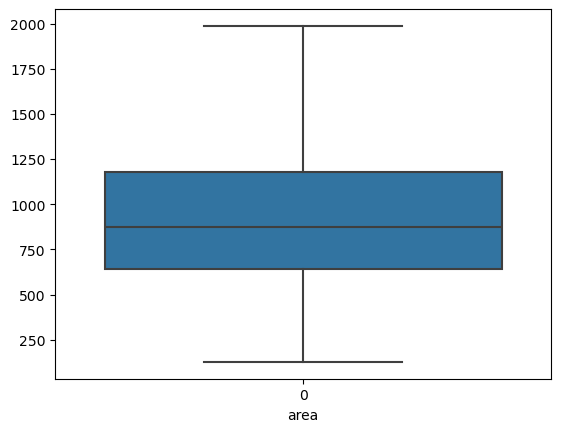

In [96]:
sns.boxplot(df4.area)
plt.xlabel('area')

Text(0.5, 0, 'bhk')

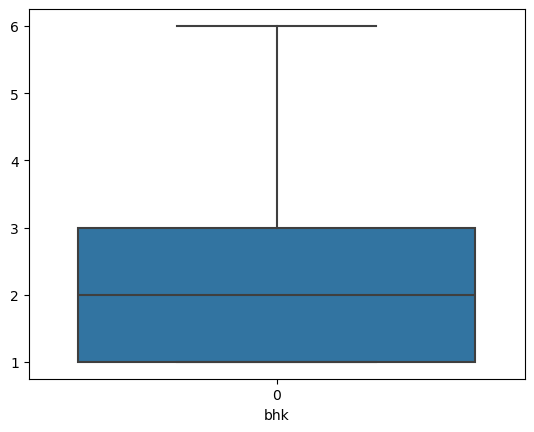

In [98]:
sns.boxplot(df4.bhk)
plt.xlabel('bhk')

In [187]:
df5 = df4.copy()
df6 = pd.get_dummies(df5.region).astype(int)
df7 = df6.drop(['Andheri West'],axis=1)

In [188]:
df7.head()

,Adaigaon,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Ambivali,Andheri East,Anjurdive,Antop Hill,...,Virar East,Virar West,Wadala,Warai,Worli,kandivali,kasaradavali thane west,mumbai,sector,vile parle west
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df8 = pd.concat([df5,df7],axis=1)
df8.shape

(76038, 236)

In [190]:
df9 = df8.drop(['price','price_unit','type','region'],axis=1)
df9.head()

,bhk,area,status,age,price_in_lakhs,Adaigaon,Agripada,Airoli,Ambarnath,Ambernath East,...,Virar East,Virar West,Wadala,Warai,Worli,kandivali,kasaradavali thane west,mumbai,sector,vile parle west
0,3,685,Ready to move,New,250.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,640,Under Construction,New,52.51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,610,Under Construction,New,173.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,876,Under Construction,New,59.98,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,659,Under Construction,New,94.11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
df9.shape

(76038, 232)

#### **Ordinal Encoding**

In [192]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Under Construction','Ready to move'],['Unknown', 'Resale', 'New']])

encoded_status_age = oe.fit_transform(df9[['status','age']])

df9[['status','age']]=encoded_status_age

df9.head()

,bhk,area,status,age,price_in_lakhs,Adaigaon,Agripada,Airoli,Ambarnath,Ambernath East,...,Virar East,Virar West,Wadala,Warai,Worli,kandivali,kasaradavali thane west,mumbai,sector,vile parle west
0,3,685,1.0,2.0,250.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,640,0.0,2.0,52.51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,610,0.0,2.0,173.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,876,0.0,2.0,59.98,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,659,0.0,2.0,94.11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Spliting the data into train and test data**

In [193]:
X=df9.drop(['price_in_lakhs'],axis=1)
y=df9.price_in_lakhs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60830, 231), (15208, 231), (60830,), (15208,))

#### **Fiting the model using Linear Regression**

In [194]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('R2 score is',r2_score(y_test,y_pred))

R2 score is 0.7670821647875438


#### So, here we are getting 77% accuracy, which is not bad. Although we are not using any hyperparameter for tunning. Eventually after using hyperparameter the accuracy will increase.

In [ ]:
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print('R2 score is',r2_score(y_test,y_pred))

In [195]:
X.columns

Index(['bhk', 'area', 'status', 'age', 'Adaigaon', 'Agripada', 'Airoli',
       'Ambarnath', 'Ambernath East', 'Ambernath West',
       ...
       'Virar East', 'Virar West', 'Wadala', 'Warai', 'Worli', 'kandivali',
       'kasaradavali thane west', 'mumbai', 'sector', 'vile parle west'],
      dtype='object', length=231)

In [196]:
np.where(X.columns=='Naigaon East')[0][0]

127

In [198]:
def predict_price(location,area,status,bhk,age):
     
    if location =='Andheri West':
        x = np.zeros(len(X.columns))
        x[0] = bhk
        x[1] = area
        x[2] = status
        x[3] = age   
    else:
        loc_index = np.where(X.columns==location)[0][0]
        x = np.zeros(len(X.columns))
        x[0] = bhk
        x[1] = area
        x[2] = status
        x[3] = age
        if loc_index >= 0:
            x[loc_index] = 1


    return model.predict([x])[0]

#### **Predicting the House prices and checking it's accuracy**

In [199]:
predict_price('Andheri West',685,1,3,2)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


232.3602167335356

In [200]:
predict_price('Boisar',2921,0,5,2)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


555.2696435268024

In [201]:
predict_price('Santacruz East',778,0,3,2)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


215.744082769538

In [209]:
import pickle
with open('mumbai_house_prices_model.pkl','wb') as f:
    pickle.dump(model,f)

In [208]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))